In [3]:
!pip install spicy
!pip install matplotlib
!pip install numpy

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

### Here is my function

In [7]:
def total_b(pdf: list, b_right: bool):
    if b_right:
        total_prob = []
        for i, prob in enumerate(pdf):
            total_prob.append(prob * (len(pdf) - i - 1) / (len(pdf) - 1))
        return sum(total_prob)
    total_prob = []
    for i, prob in enumerate(pdf):
        total_prob.append(prob * i / (len(pdf) - 1))
    return sum(total_prob)

In [8]:
def b_given_a(a: int, num: int, b_right: bool):
    return (num - a - 1) / (num - 1) if b_right else a / (num - 1)

In [9]:
def update(pdf: list, b_right: bool):
    tb = total_b(pdf, b_right)
    for i in range(len(pdf)):
        pdf[i] = b_given_a(i, len(pdf), b_right) * pdf[i] / tb

In [16]:
n = 100
pos = 50
pdf = [1/n for _ in range(n)]
import random
for i in range(100):
    update(pdf, random.randint(0, n - 1) > pos)

In [17]:
def simulate(n, pos, pdf, num_throws):
    for i in range(num_throws):
        update(pdf, random.randint(0, n - 1) > pos)

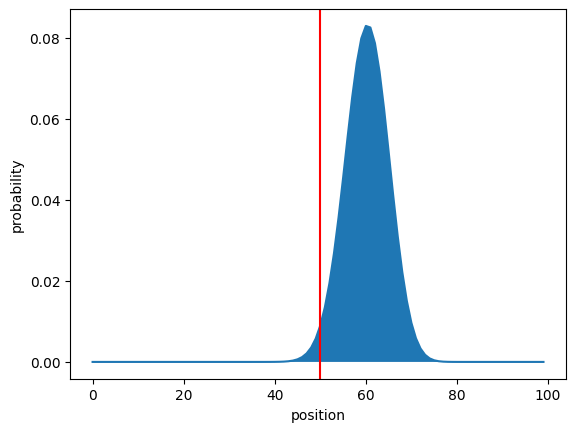

In [18]:
x = [i for i in range(len(pdf))]
 
# Plotting the Graph
plt.plot(x, pdf)
plt.fill_between(x, pdf)
plt.axvline(pos, color=(1.0, 0, 0))
plt.xlabel("position")
plt.ylabel("probability")
plt.show()

In [225]:
maxs = []
for i in range(10000):
    n = 100
    pos = 50
    pdf = [1/n for _ in range(n)]
    simulate(n, pos, pdf, 6)
    maxs.append(pdf.index(max(pdf)))

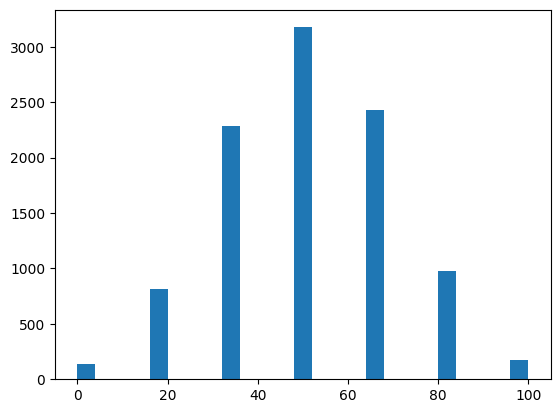

In [230]:
plt.hist(maxs, bins=25, range=(0, 100))
plt.show()